# Notebook Challenge 3: naar multiagent systemen

## Uitleg
Binnen deze opdracht is een greedy helperagent uitgewerkt. De agent doorloopt de volgende stappen:
<img src="pics/uitleg_greedy.jpg" alt="Autonomy of the body" width=80%>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
from loan.batchrunner import run_batch
import loan.helpers as helpl 

df = run_batch()

0it [00:00, ?it/s]

BatchRunner MP will use 16 processors.


14000it [01:06, 209.19it/s]


In [3]:
df.head()

,factory_location,N,helper_type,Run,End time,Hitpoints,Ill vertices,Vertices healed
3700,5,4,greedyhelperagent,0,64,-2,"[12, 10, 11, 9]",9
613,1,8,helperagent,0,95,-3,"[12, 13, 14, 10]",13
3495,5,2,greedyhelperagent,0,56,-3,"[10, 9, 4, 13]",9
6400,9,1,helperagent,0,51,0,"[2, 1, 12, 6]",5
8203,11,2,helperagent,0,84,-1,"[4, 1, 9]",12


In [4]:
df.groupby(["helper_type", "factory_location"]).mean().sort_values(["End time"], ascending=False)

N   Run  End time  Hitpoints  \
helper_type       factory_location                                    
helperagent       8                 3.75  49.5   83.6100     8.1550   
                  6                 3.75  49.5   81.3150     8.2650   
                  9                 3.75  49.5   80.8800     8.3425   
                  7                 3.75  49.5   79.0525     6.6400   
                  5                 3.75  49.5   78.1425     7.3725   
                  3                 3.75  49.5   77.3200     5.3150   
                  10                3.75  49.5   76.6150     2.9975   
                  13                3.75  49.5   76.3525     3.3700   
                  11                3.75  49.5   76.2825     3.2000   
                  2                 3.75  49.5   75.8325     5.7500   
                  4                 3.75  49.5   74.9350     3.3650   
                  12                3.75  49.5   73.2275     2.5825   
                  14                3.75  49.5   73.0300     2.3475   
greedyhelperagent 8                 3.75  49.5   70.4850    -1.4275   
                  5                 3.75  49.5   70.0950    -1.4350   
                  6                 3.75  49.5   69.8775    -1.3975   
                  3                 3.75  49.5   69.4700    -1.2450   
                  7                 3.75  49.5   69.4475    -1.3750   
                  2                 3.75  49.5   69.0950    -1.3600   
helperagent       1                 3.75  49.5   68.3300     0.2000   
greedyhelperagent 9                 3.75  49.5   68.1500    -1.5350   
                  11                3.75  49.5   67.4100    -1.2475   
                  13                3.75  49.5   67.0475    -1.5700   
                  4                 3.75  49.5   66.4300    -1.4425   
                  10                3.75  49.5   66.3875    -1.4350   
                  14                3.75  49.5   65.5000    -1.3475   
                  12                3.75  49.5   65.3475    -1.4550   
                  1                 3.75  49.5   63.3225    -1.4625   

                                    Vertices healed  
helper_type       factory_location                   
helperagent       8                         12.4200  
                  6                         11.7525  
                  9                         11.3025  
                  7                         11.2175  
                  5                         10.7250  
                  3                         10.8150  
                  10                        10.2925  
                  13                        10.4450  
                  11                         9.9625  
                  2                          9.9225  
                  4                          9.6700  
                  12                         9.1325  
                  14                         9.2200  
greedyhelperagent 8                          6.2625  
                  5                          6.2125  
                  6                          6.3950  
                  3                          6.4300  
                  7                          5.9650  
                  2                          6.2475  
helperagent       1                          7.7700  
greedyhelperagent 9                          6.1450  
                  11                         5.7650  
                  13                         5.8075  
                  4                          5.1600  
                  10                         5.5100  
                  14                         5.3250  
                  12                         5.4025  
                  1                          4.7600

## Plotten van de resultaten
Allereerst wordt de representatie van het lichaam getoond.

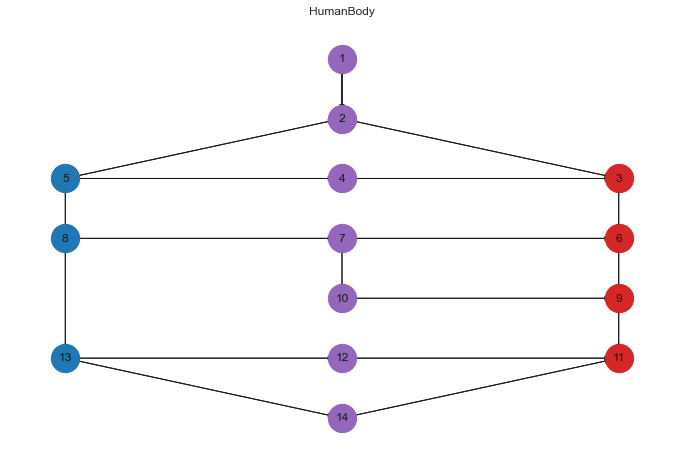

In [5]:
graph = helpl.graph_from_json(r"./loan/data/network.json")
plt.figure(figsize=(12,8))
helpl.plot_graph(graph)

### plotting the results of the experiment

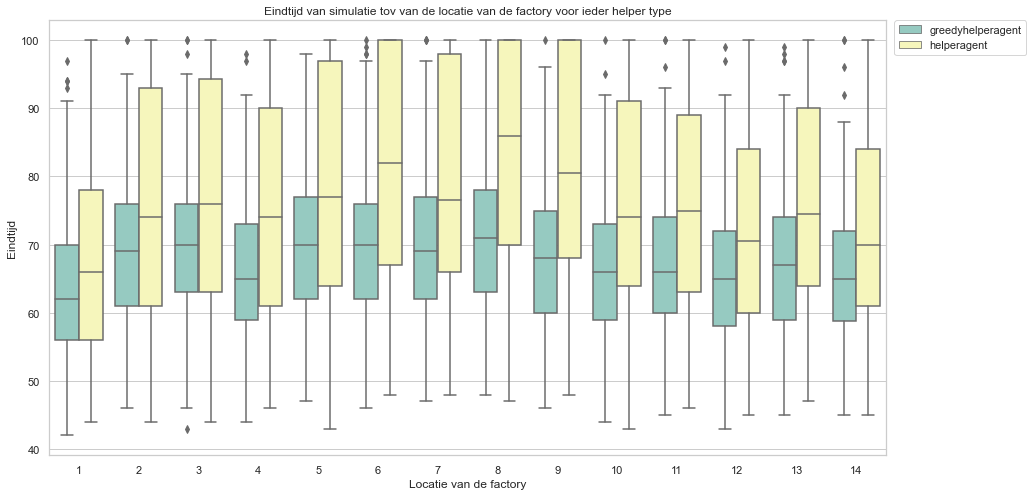

In [8]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="factory_location", y="End time", hue="helper_type",
                 data=df, palette="Set3")
ax.set_title("Eindtijd van simulatie tov van de locatie van de factory voor ieder helper type")
ax.set_xlabel("Locatie van de factory")
ax.set_ylabel("Eindtijd")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()